# Empirical Orthogonal Functions (EOF)

* In atmospheric sciences, Empirical Orthogonal Functions (EOF) are a technique used to **analyze and describe the spatial variability of a dataset over time**

* Specifically, the **eigenvectors and eigenvalues of a correlation matrix** are used to analyze and describe the spatial variability of a dataset over time.

* Firstly, a **correlation matrix is constructed from the original data**. This matrix reflects the **linear relationships between different variables (pixels)** and their degree of covariation.
* Next, the **eigenvectors and eigenvalues** of this matrix are calculated.
* The **eigenvectors**, also known as modes, represent the **spatial patterns of variability in the data**.
* The **eigenvalues indicate the relative importance of each eigenvector** in the total variability of the data. A higher eigenvalue corresponds to a greater amount of variance explained by the respective eigenvector.
* The **eigenvectors are ordered according to their eigenvalues**, with the first ones representing the main modes of variability and the later ones representing secondary modes.
* The **eigenvectors represent the principal directions in which the data vary**. 
* Each **eigenvector is orthogonal to the others**, meaning that they are independent and not correlated with each other.
* These vectors provide an orthogonal basis in which the **dataset can be decomposed**.

# Principal Components (PCs)

* In atmospheric sciences, **Empirical Orthogonal Functions (EOFs)** represent the spatial maps of oscillation or spatial variability in an atmospheric dataset. The **eigenvectors (EOFs)** represent the principal directions in which the data vary spatially.

* On the other hand, **Principal Components (PCs) are the projection of the original data onto the eigenvectors (EOFs)**.
* The **multiplication of the EOF by the PC is a way to reconstruct the spatial fields over time**. 
* The EOF captures the dominant spatial variability, and the PC represents the temporal contribution of that dominant variability. By multiplying them, you obtain an estimation of **how that spatial structure varies over time**.



## Data source:

https://climate.usu.edu/people/yoshi/pyclm101/monthly.html

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from eofs.xarray import Eof
from cartopy.util import add_cyclic_point

# Read netCDF4 file
ds = xr.open_dataset('C:\\Users\\jaech\\Mi_unidad\\CURSOS\\CURSOS_2023_III\\ANALISIS\\Archivos análisis de datos ambientales_2023_I\\Semana_09\\oisst_monthly.nc')

# Get variables
lat  = ds['lat']
lon  = ds['lon']
time = ds['time']
sst  = ds['sst']

In [2]:
print(sst)

<xarray.DataArray 'sst' (time: 476, lat: 180, lon: 360)>
[30844800 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2021-07-01
Attributes:
    long_name:             Monthly Mean of Sea Surface Temperature
    unpacked_valid_range:  [-5. 40.]
    actual_range:          [-1.7999996 35.56862  ]
    units:                 degC
    precision:             2
    var_desc:              Sea Surface Temperature
    dataset:               NOAA Optimum Interpolation (OI) SST V2
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Weekly Mean
    standard_name:         sea_surface_temperature
    cell_methods:          time: mean (monthly from weekly values interpolate...
    valid_range:           [-500 4000]


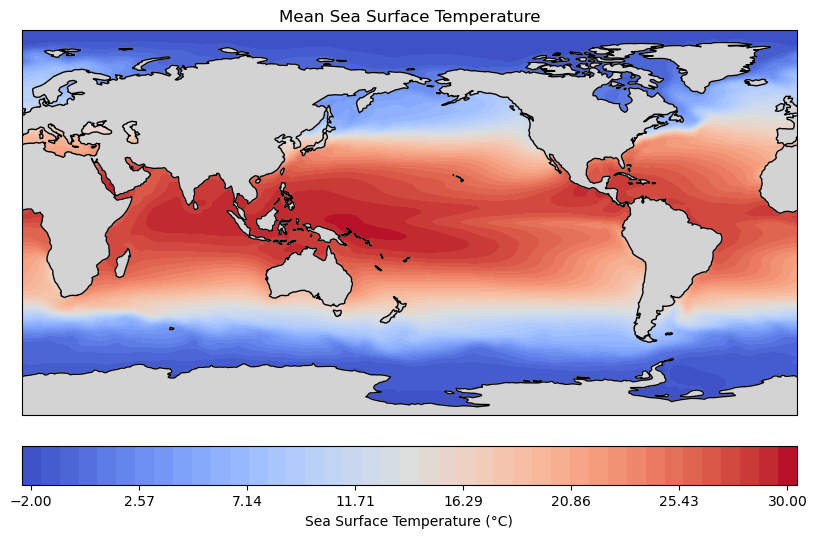

In [14]:
# Read netCDF4 file
ds = xr.open_dataset('C:\\Users\\jaech\\Mi_unidad\\CURSOS\\CURSOS_2023_III\\ANALISIS\\Archivos análisis de datos ambientales_2023_I\\Semana_09\\oisst_monthly.nc')

# Get variables
lat = ds['lat']
lon = ds['lon']
time = ds['time']
sst = ds['sst']

# Calculate the mean over the time dimension
mean_sst = sst.mean(dim='time')

# Add cyclic point to longitude
mean_sst_cyclic, lon_cyclic = add_cyclic_point(mean_sst, coord=lon)

# Create a map plot
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add land mask
land_mask = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
ax.add_feature(land_mask)

# Plot the mean sea surface temperature
im = ax.contourf(lon_cyclic, lat, mean_sst_cyclic, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=50)
ax.coastlines()

# Add colorbar
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, ticks=np.linspace(-2, 30, 8))
cbar.set_label('Sea Surface Temperature (°C)')

# Add title
plt.title('Mean Sea Surface Temperature')

# Show the plot
plt.show()


## EOF analysis without removing the annual cycle.

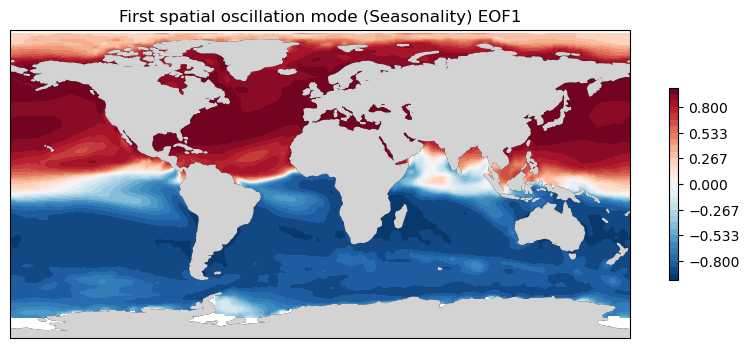

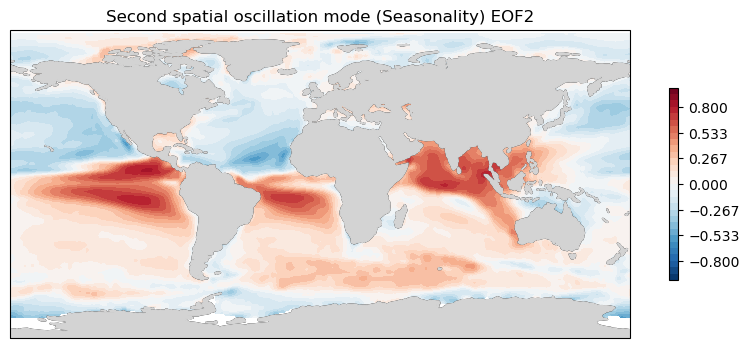

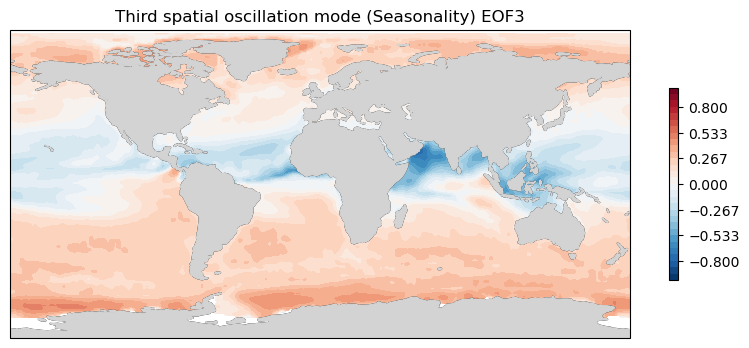

In [15]:
# Read netCDF4 file
ds = xr.open_dataset('C:\\Users\\jaech\\Mi_unidad\\CURSOS\\CURSOS_2023_III\\ANALISIS\\Archivos análisis de datos ambientales_2023_I\\Semana_09\\oisst_monthly.nc')

# Get variables
lat = ds['lat']
lon = ds['lon']
time = ds['time']
sst = ds['sst']

# Calculate EOF
solver = Eof(sst)
eof1, eof2, eof3 = solver.eofsAsCorrelation(neofs=3)

EOF = {'First EOF1': eof1, 'Second EOF2': eof2, 'Third EOF3': eof3}

# Plot EOF
for name, eof in EOF.items():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_title(name[:-5] + ' spatial oscillation mode (Seasonality) ' + name[-4:])
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    c = ax.contourf(lon, lat, eof.squeeze(), levels=np.linspace(-1, 1, 31), cmap=plt.cm.RdBu_r)
    plt.colorbar(c, ax=ax, shrink=0.5)
    # Add land mask
    land_mask = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
    ax.add_feature(land_mask)
    plt.show()

## EOF analysis in DJF without removing the annual cycle.

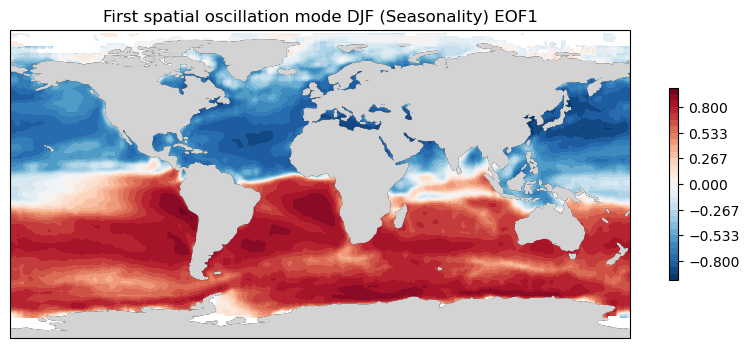

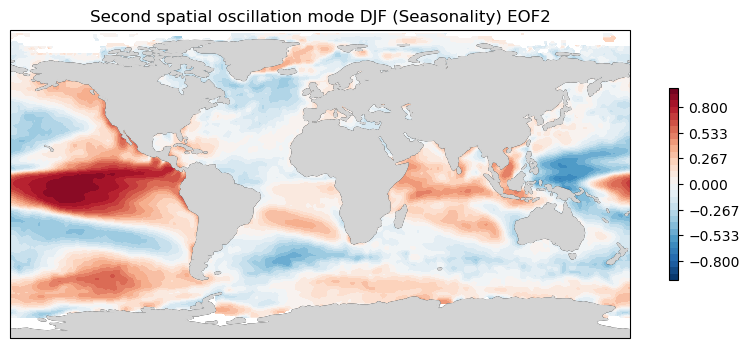

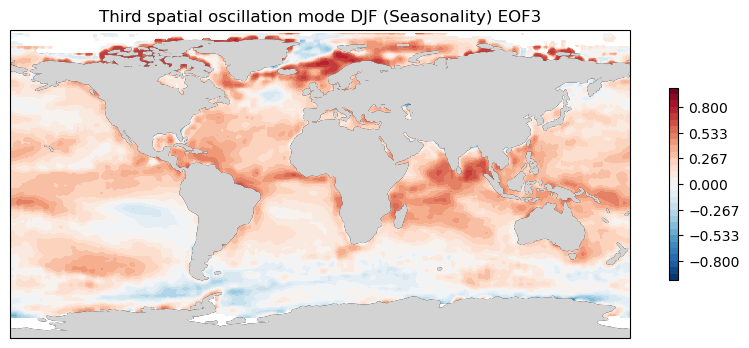

In [16]:
# Read netCDF4 file
ds = xr.open_dataset('C:\\Users\\jaech\\Mi_unidad\\CURSOS\\CURSOS_2023_III\\ANALISIS\\Archivos análisis de datos ambientales_2023_I\\Semana_09\\oisst_monthly.nc')

# Get variables
lat = ds['lat']
lon = ds['lon']
time = ds['time']
sst = ds['sst']

# Calculate EOF
sst_djf = ds.sel(time=ds['time.season']=='DJF')['sst']
solver = Eof(sst_djf)

eof1, eof2, eof3 = solver.eofsAsCorrelation(neofs=3)

EOF = {'First EOF1': eof1, 'Second EOF2': eof2, 'Third EOF3': eof3}

# Plot EOF
for name, eof in EOF.items():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_title(name[:-5] + ' spatial oscillation mode DJF (Seasonality) ' + name[-4:])
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    c = ax.contourf(lon, lat, eof.squeeze(), levels=np.linspace(-1, 1, 31), cmap=plt.cm.RdBu_r, vmin=-1, vmax=1)
    plt.colorbar(c, ax=ax, shrink=0.5)
    # Add land mask
    land_mask = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
    ax.add_feature(land_mask)
    plt.show()


## EOF analysis in DJF removing the annual cycle.

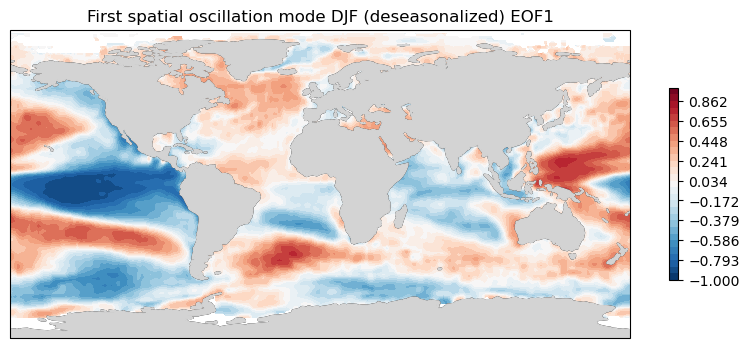

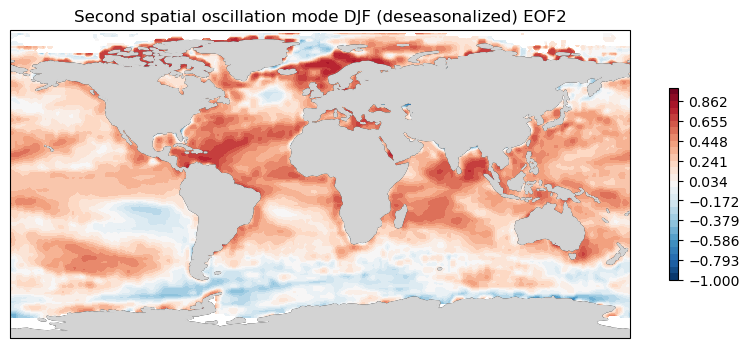

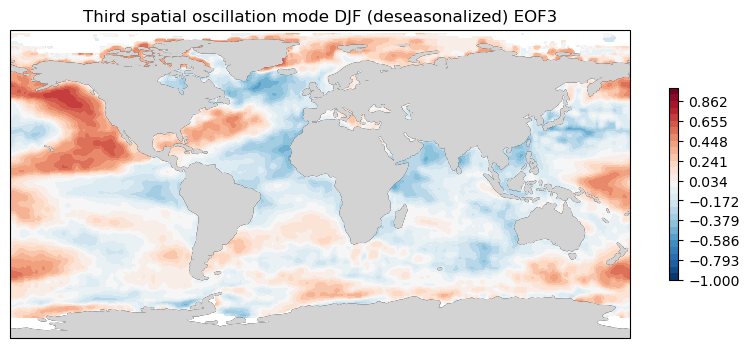

In [17]:
# Read netCDF4 file
ds = xr.open_dataset('C:\\Users\\jaech\\Mi_unidad\\CURSOS\\CURSOS_2023_III\\ANALISIS\\Archivos análisis de datos ambientales_2023_I\\Semana_09\\oisst_monthly.nc')

# Get variables
lat = ds['lat']
lon = ds['lon']
time = ds['time']
sst = ds['sst']

# Calculate average climatology
climatology = ds.groupby('time.month').mean(dim='time')

# Remove annual cycle
ds = ds.groupby('time.month') - climatology

# Calculate EOF
sst_djf = ds.sel(time=ds['time.season']=='DJF')['sst']
solver = Eof(sst_djf)

eof1, eof2, eof3 = solver.eofsAsCorrelation(neofs=3)

EOF = {'First EOF1': eof1, 'Second EOF2': eof2, 'Third EOF3': eof3}

# Plot EOF
for name, eof in EOF.items():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_title(name[:-5] + ' spatial oscillation mode DJF (deseasonalized) ' + name[-4:])
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.OCEAN, color='white')
    c = ax.contourf(lon, lat, eof.squeeze(), levels=np.linspace(-1, 1, 30), cmap=plt.cm.RdBu_r, vmin=-1, vmax=1)
    plt.colorbar(c, ax=ax, shrink=0.5)
    # Add land mask
    land_mask = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
    ax.add_feature(land_mask)
    plt.show()


## Variance explained Pacific Ocean (deseasonalized data)

* The variance explained vs EOF plot is a graphical representation that shows the **amount of variability explained by each Empirical Orthogonal Function (EOF)** or principal component in a Principal Component Analysis (PCA) applied to a dataset.

* In this plot, the vertical axis represents the fraction of the total variance explained by each EOF or principal component. It is typically expressed as a percentage. The horizontal axis shows the number of the EOF, ranging from the first to the last.

* The variance explained vs EOF plot is useful for determining **how many EOFs or principal components are needed to capture a significant amount of variability in the data**. 
* The eigenvalues associated with each EOF indicate the amount of variability explained by that particular component. Therefore, by **summing the variances explained by each EOF in descending order**, one can obtain the cumulative variance explained by the selected set of EOFs.

* This plot **allows for the identification of the main modes of variability that capture the majority of information** in the data and helps determine if additional EOFs are necessary to capture a significant amount of remaining variability. Typically, a point of inflection in the plot is sought, where the addition of more EOFs does not contribute significantly to the explained variance.

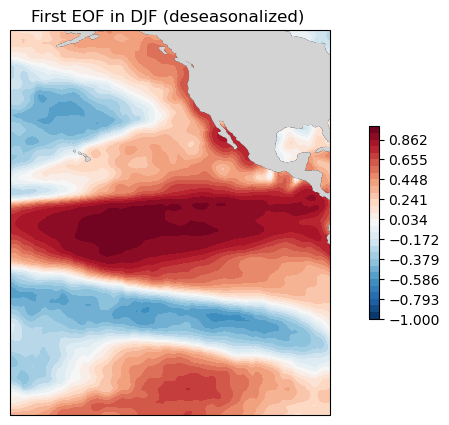

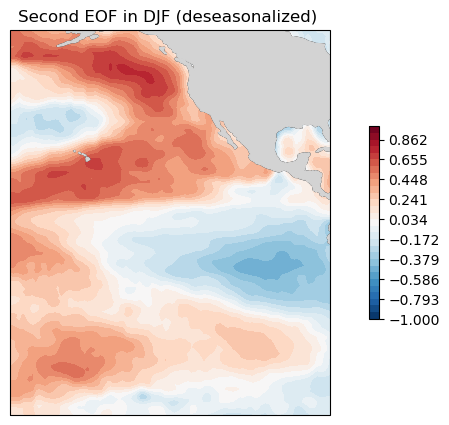

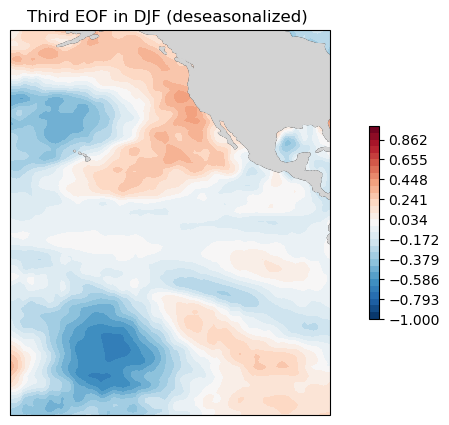

In [18]:
# Read netCDF4 file
ds = xr.open_dataset('C:\\Users\\jaech\\Mi_unidad\\CURSOS\\CURSOS_2023_III\\ANALISIS\\Archivos análisis de datos ambientales_2023_I\\Semana_09\\oisst_monthly.nc')

# Define Pacific Ocean longitude boundaries
lon_min = 180  # Longitud mínima
lon_max = 280  # Longitud máxima

# Select Pacific Ocean data
ds_pacific = ds.sel(lon=slice(lon_min, lon_max))

# Cut latitudes between -60 and 60
ds_pacific = ds_pacific.sel(lat=slice(60, -60))

# Get variables
lat = ds_pacific['lat']
lon = ds_pacific['lon']
time = ds_pacific['time']
sst = ds_pacific['sst']

# Calculate average climatology
climatology = ds_pacific.groupby('time.month').mean(dim='time')

# Remove annual cycle
ds_deseasonalized = ds_pacific.groupby('time.month') - climatology

# Calculate EOF
sst_djf = ds_deseasonalized.sel(time=ds_deseasonalized['time.season']=='DJF')['sst']
solver = Eof(sst_djf)

eof1, eof2, eof3 = solver.eofsAsCorrelation(neofs=3)

EOF = {'First EOF1': eof1, 'Second EOF2': eof2, 'Third EOF3': eof3}

# Plot EOF
for name, eof in EOF.items():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_title(name[:-5] + ' EOF in DJF (deseasonalized) ')
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.OCEAN, color='white')
    c = ax.contourf(lon, lat, eof.squeeze(), levels=np.linspace(-1, 1, 30), cmap=plt.cm.RdBu_r, vmin=-1, vmax=1)
    plt.colorbar(c, ax=ax, shrink=0.5)
    # Add land mask
    land_mask = cfeature.NaturalEarthFeature('physical', 'land', '110m', edgecolor='face', facecolor='lightgray')
    ax.add_feature(land_mask)
    plt.show()


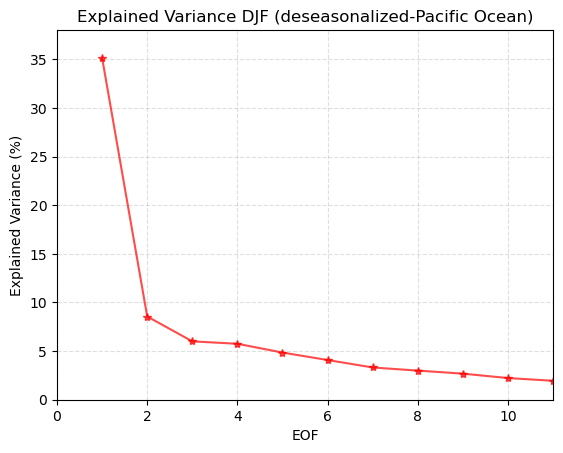

In [8]:
# Read netCDF4 file
ds = xr.open_dataset('C:\\Users\\jaech\\Mi_unidad\\CURSOS\\CURSOS_2023_III\\ANALISIS\\Archivos análisis de datos ambientales_2023_I\\Semana_09\\oisst_monthly.nc')

# Define Pacific Ocean longitude boundaries
lon_min = 180  # Longitud mínima
lon_max = 280  # Longitud máxima

# Select Pacific Ocean data
ds_pacific = ds.sel(lon=slice(lon_min, lon_max))

# Cut latitudes between -60 and 60
ds_pacific = ds_pacific.sel(lat=slice(60, -60))

# Get variables
lat = ds_pacific['lat']
lon = ds_pacific['lon']
time = ds_pacific['time']
sst = ds_pacific['sst']

# Calculate average climatology
climatology = ds_pacific.groupby('time.month').mean(dim='time')

# Remove annual cycle
ds_anomalies = ds_pacific.groupby('time.month') - climatology

# Calculate EOF
sst_djf = ds_anomalies.sel(time=ds_anomalies['time.season'] == 'DJF')['sst']
solver = Eof(sst_djf)

# Obtain EOFs
eof1, eof2, eof3 = solver.eofsAsCorrelation(neofs=3)

# Calculate explained variance
var_exp = solver.varianceFraction()

# Plot explained variance of each EOF
plt.plot(range(1, len(var_exp) + 1), var_exp * 100, marker='*', color='r', alpha=0.7)
plt.xlabel('EOF')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance DJF (deseasonalized-Pacific Ocean)')
plt.grid(alpha=0.4, ls='--')
plt.xlim(0, 11)
plt.ylim(0, 38)
plt.show()


# Fourier

* The Fourier transform is a mathematical tool used in atmospheric sciences to **analyze the temporal and spatial variability of atmospheric phenomena**. 

* It involves decomposing a signal or a field of data into a **combination of sinusoidal components with different frequencies**.

* In the context of atmospheric sciences, the Fourier transform **is commonly applied to time series of climate data** such as temperature, atmospheric pressure, or wind patterns. It is also used in spatial analysis of atmospheric data fields, such as the distribution of temperature or pressure in a region.

* The Fourier transform allows for the decomposition of a **signal or data field into its frequency components**, revealing the presence of **periodic patterns and oscillations in the data**. 
* This is particularly useful in identifying cycles and variability at different temporal scales, ranging from **daily variations to seasonal or long-term variations**.

* By applying the Fourier transform, a **frequency spectrum is obtained**, which shows the amplitude and phase of each frequency component present in the data. 
* The **frequency spectrum represents the relative contribution of each frequency to the original signal**. Higher-amplitude components in the spectrum indicate a greater presence of oscillations at those particular frequencies.

### Fourier applied to Niño34
The Fourier transform is applied to the sea surface temperature (SST) data in the Niño 3.4 region.

C:\Users\jaech\AppData\Local\Temp\ipykernel_24092\1073893081.py:17: RuntimeWarning: divide by zero encountered in true_divide
  periodos = 1 / np.fft.fftfreq(len(sst_nino34_mean))


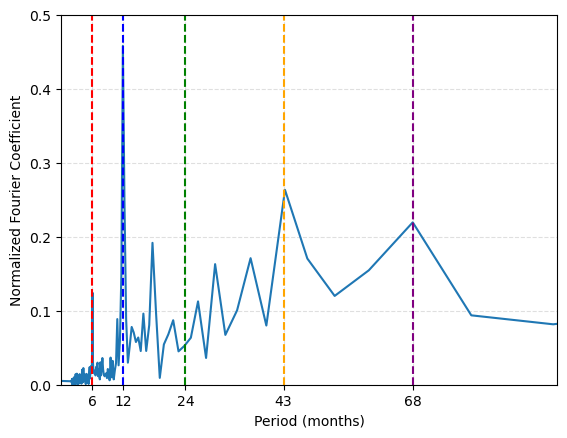

In [9]:
ds = xr.open_dataset('C:\\Users\\jaech\\Mi_unidad\\CURSOS\\CURSOS_2023_III\\ANALISIS\\Archivos análisis de datos ambientales_2023_I\\Semana_09\\oisst_monthly.nc')

sst        = ds.sst[:,:,:] # toma todas las rebanadas de pan, es decir todos los mapas en el tiempo
# Seleccionar datos en la región Niño 3-4
sst_nino34 = sst.sel(lat=slice(5, -5), lon=slice(200, 270))

# Tomar promedio espacial
sst_nino34_mean = sst_nino34.mean(dim=['lat', 'lon'])

# Transformada de Fourier
sst_nino34_fft = np.fft.fft(sst_nino34_mean)

# Coeficientes de Fourier normalizados
sst_nino34_fft_norm = np.abs(sst_nino34_fft / len(sst_nino34_mean))

# Periodos
periodos = 1 / np.fft.fftfreq(len(sst_nino34_mean))

# Graficar periodos vs coeficientes de Fourier normalizados
plt.plot(periodos, sst_nino34_fft_norm)

# Configure the plot
plt.xlabel('Period (months)')
plt.ylabel('Normalized Fourier Coefficient')
plt.xlim([0, 96])
plt.ylim([0, 0.5])
plt.grid(alpha=0.4, ls='--')

# Draw vertical lines
plt.axvline(x=6, color='red', linestyle='--')
plt.axvline(x=12, color='blue', linestyle='--')
plt.axvline(x=24, color='green', linestyle='--')
plt.axvline(x=43, color='orange', linestyle='--')
plt.axvline(x=68, color='purple', linestyle='--')

# Set xticks
plt.xticks([6, 12, 24, 43, 68])
plt.show()


The visualization of the normalized Fourier series is performed as a function of period (months), with vertical lines added at specific periods of interest (6 months, 12 months, 24 months, 43 months, and 68 months). These vertical lines and corresponding xticks highlight the periods of significance identified through Fourier transform analysis of sea surface temperature data in the Niño 3.4 region.